In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats,lngs))
lat_lngs

[(28.363774168939216, 10.681047299021941),
 (-64.23742481408188, -145.05631977042643),
 (2.263142999072116, -3.720719783548958),
 (64.80965805582994, 19.659872827865684),
 (44.26391825257559, -24.714682217402213),
 (89.93022884229046, -63.807295007016165),
 (-18.543347740177225, -136.34034633577755),
 (-24.184999928346144, -106.05047888835009),
 (14.120239526200237, 168.05678453018663),
 (0.962496768744586, -170.8324467892263),
 (-52.55154302586972, -99.92128543298186),
 (20.14052733178694, -74.83909299813499),
 (-67.41389697821042, -115.22739207994599),
 (-35.37557262231856, 108.33599843559506),
 (-33.577967929643044, 78.52488995736837),
 (-41.131881365303656, -174.66491771735468),
 (48.83102276556443, -148.14232552582874),
 (-49.61360243585663, 63.66370860913989),
 (-22.314046434562542, 145.74690495498004),
 (61.77270108563303, -70.47295516221921),
 (-62.55318877826349, -134.08760785990822),
 (-57.51913706201162, -12.875970383026015),
 (-50.226281527454574, -4.01553601343187),
 (72.5

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [4]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
###  Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
###  City, country, and date
###  Latitude and longitude
###  Maximum temperature
###  Humidity
###  Cloudiness
###  Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | awbari
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | axim
Processing Record 4 of Set 1 | umea
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | guantanamo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | charters towers
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | amderma


Processing Record 30 of Set 4 | villanueva de la serena
Processing Record 31 of Set 4 | arcata
Processing Record 32 of Set 4 | yellowknife
Processing Record 33 of Set 4 | kruisfontein
Processing Record 34 of Set 4 | itaituba
Processing Record 35 of Set 4 | hibbing
Processing Record 36 of Set 4 | belyy yar
Processing Record 37 of Set 4 | uruzgan
Processing Record 38 of Set 4 | nakur
Processing Record 39 of Set 4 | waipawa
Processing Record 40 of Set 4 | kendari
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | dong xoai
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | sasolburg
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | conakry
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 4 | balyaga
Processing Record 1 of Set 5 | tari
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | raton
Processin

Processing Record 17 of Set 8 | elizabeth city
Processing Record 18 of Set 8 | lauria
Processing Record 19 of Set 8 | mogadishu
Processing Record 20 of Set 8 | lucea
Processing Record 21 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 22 of Set 8 | springdale
Processing Record 23 of Set 8 | longlac
City not found. Skipping...
Processing Record 24 of Set 8 | lima
Processing Record 25 of Set 8 | haldia
Processing Record 26 of Set 8 | sao filipe
Processing Record 27 of Set 8 | zhaocheng
City not found. Skipping...
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | chopovychi
Processing Record 31 of Set 8 | troitskoye
Processing Record 32 of Set 8 | tubruq
City not found. Skipping...
Processing Record 33 of Set 8 | barabinsk
Processing Record 34 of Set 8 | lasa
Processing Record 35 of Set 8 | fairbanks
Processing Record 36 of Set 8 | gamba
Processing Record 37 of Set 8 | sokoni
Processing Record 38 of Set 8

Processing Record 2 of Set 12 | atbasar
Processing Record 3 of Set 12 | matay
Processing Record 4 of Set 12 | shitanjing
Processing Record 5 of Set 12 | shimoda
Processing Record 6 of Set 12 | ngaoundere
Processing Record 7 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 8 of Set 12 | khani
Processing Record 9 of Set 12 | hualmay
Processing Record 10 of Set 12 | cururupu
Processing Record 11 of Set 12 | tonj
City not found. Skipping...
Processing Record 12 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 13 of Set 12 | olga
Processing Record 14 of Set 12 | puerto ayacucho
Processing Record 15 of Set 12 | altamont
Processing Record 16 of Set 12 | grindavik
Processing Record 17 of Set 12 | shingu
Processing Record 18 of Set 12 | san joaquin
Processing Record 19 of Set 12 | thinadhoo
Processing Record 20 of Set 12 | ulaangom
Processing Record 21 of Set 12 | kayerkan
Processing Record 22 of Set 12 | madingou
Processing Record 23 of Set 12 | port hedl

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awbari,26.59,12.77,69.49,28,0,12.44,LY,2019-11-06 06:10:33
1,Mataura,-46.19,168.86,59.00,74,61,8.99,NZ,2019-11-06 06:10:33
2,Axim,4.87,-2.24,74.05,94,0,0.65,GH,2019-11-06 06:10:33
3,Umea,63.83,20.26,21.20,79,85,6.93,SE,2019-11-06 06:10:33
4,Praia Da Vitoria,38.73,-27.07,60.80,77,75,6.29,PT,2019-11-06 06:10:34
5,Narsaq,60.91,-46.05,32.00,83,79,6.93,GL,2019-11-06 06:10:34
6,Rikitea,-23.12,-134.97,76.55,82,50,4.45,PF,2019-11-06 06:10:34
7,Puerto Ayora,-0.74,-90.35,68.00,93,8,5.01,EC,2019-11-06 06:10:34
8,Butaritari,3.07,172.79,84.76,72,82,9.53,KI,2019-11-06 06:10:34
9,Castro,-42.48,-73.76,45.23,94,98,7.63,CL,2019-11-06 06:10:35


In [7]:
newColumnOrder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[newColumnOrder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Awbari,LY,2019-11-06 06:10:33,26.59,12.77,69.49,28,0,12.44
1,Mataura,NZ,2019-11-06 06:10:33,-46.19,168.86,59.00,74,61,8.99
2,Axim,GH,2019-11-06 06:10:33,4.87,-2.24,74.05,94,0,0.65
3,Umea,SE,2019-11-06 06:10:33,63.83,20.26,21.20,79,85,6.93
4,Praia Da Vitoria,PT,2019-11-06 06:10:34,38.73,-27.07,60.80,77,75,6.29
...,...,...,...,...,...,...,...,...,...
562,Yanagawa,JP,2019-11-06 06:12:55,33.16,130.41,70.00,49,20,6.93
563,Misratah,LY,2019-11-06 06:12:56,32.38,15.09,73.96,48,0,12.59
564,San Juan Del Sur,NI,2019-11-06 06:12:56,11.25,-85.87,81.59,77,0,25.95
565,Shenkursk,RU,2019-11-06 06:12:56,62.11,42.91,23.74,72,100,8.57


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time

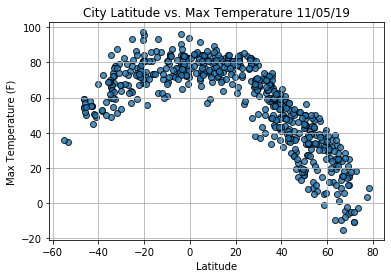

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

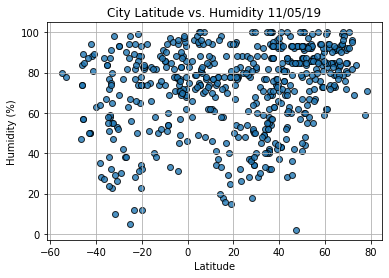

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()